In [42]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exploring Boston Data Set

In [21]:
boston = load_boston()

In [22]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [23]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [24]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [25]:
X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [7]:
X_rooms = X[:,5].reshape(-1, 1)
X_rooms.shape

(506, 1)

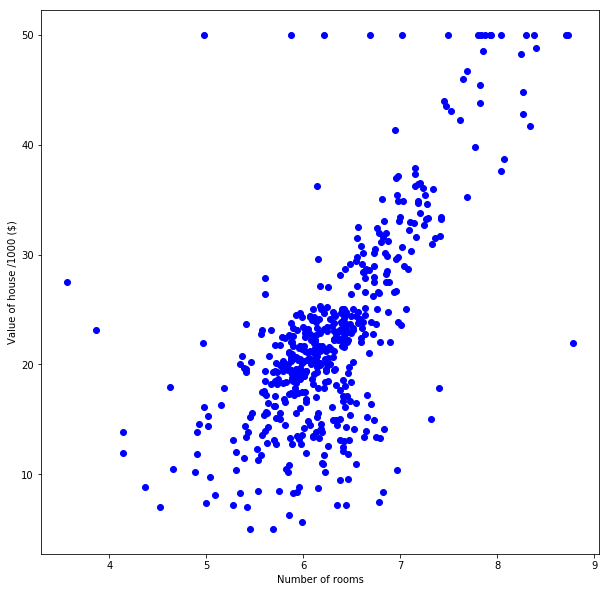

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(X_rooms, y, color='blue')
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

## Fit & predict

In [9]:
# Create the prediction space
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
prediction_space.shape

(50, 1)

In [10]:
ln = LinearRegression()
ln.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Compute predictions over the prediction space
y_pred = ln.predict(prediction_space)
y_pred.shape

(50,)

In [15]:
ln.coef_.shape, ln.coef_[0], ln.intercept_

((1,), 9.1021089811803098, -34.670620776438568)

In [13]:
# y = model.coef_[0] * x + model.intercept_

In [85]:
# Print R^2 
ln.score(X_rooms, y)

0.48352545599133429

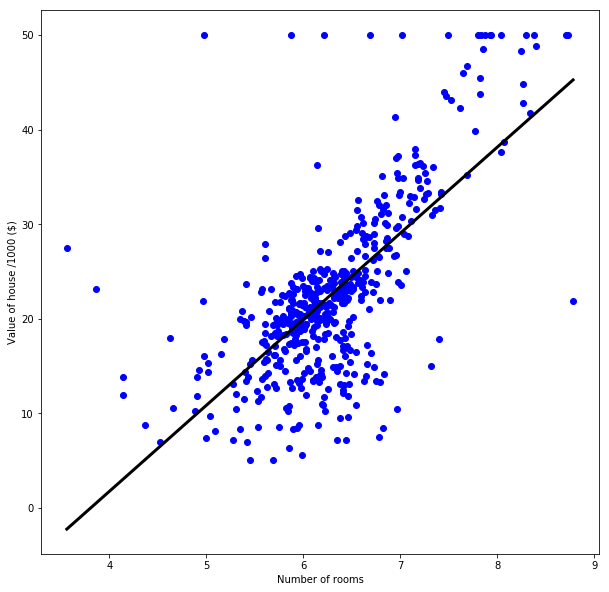

In [86]:
plt.figure(figsize=(10,10))
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

## Train/test split

In [98]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rooms, y, test_size=0.2, random_state=101)

In [99]:
ln = LinearRegression()
ln.fit(X_train, y_train)
y_pred = ln.predict(X_test)

In [96]:
# Compute R^2 
ln.score(X_test, y_test)

0.51528984962461699

In [97]:
# Compute Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, y_pred))

6.9363106830364964

## Cross-validation

In [115]:
ln = LinearRegression()
ln

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
# Compute 5-fold cross-validation scores
cv_scores = cross_val_score(ln, X_test, y_test, cv=5)
cv_scores

array([ 0.64980476,  0.32820405,  0.22597166, -0.27225232,  0.64249661])

In [117]:
#Average 5-Fold CV Score
np.mean(cv_scores)

0.31484495210792895

## Regularization I: Lasso
Lasso Regression (L1 Regularization) select important features of dataset)

In [28]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
# Compute the coefficients
lasso_coef = lasso.coef_
lasso_coef

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469429, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795828,  0.        , -0.42817442])

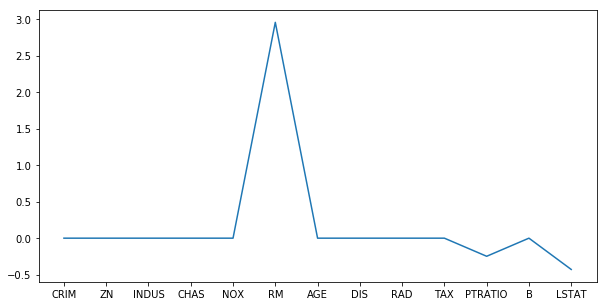

In [40]:
# Plot the coefficients
names = df.drop('MEDV', axis=1).columns
plt.figure(figsize=(10, 5))
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names)
plt.show()

## Regularization II: Ridge
Ridge Regression (L2 Regularization) prevent from overfitting to outliers, very high alpha parameter can lead to underfitting

In [48]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [49]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [50]:
ridge = Ridge(normalize=True)
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [51]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use
    ridge.alpha = alpha
    
    # Perform 10-fold CV
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

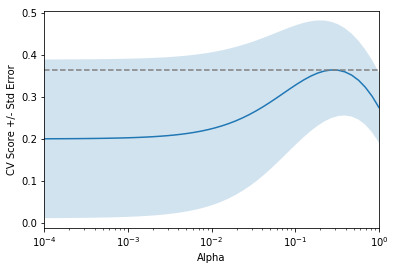

In [52]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)